In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
PATHS = 4096
STEPS = 512
SIGMA = 0.03

In [3]:
standard_normals = np.random.normal(size=(STEPS, PATHS))
prices = np.zeros_like(standard_normals)

prices[0,:] = np.exp(-0.5 * SIGMA * SIGMA + SIGMA * standard_normals[0, :])
for step in range(1, STEPS):
    prices[step,:] = prices[step-1, :] * np.exp(-0.5 * SIGMA * SIGMA + SIGMA * standard_normals[step, :])

In [4]:
print("Mean ending price should be close to 1: Actual={:.4f}".format(
    np.mean(prices[-1]))
)
print("Standard deviation of log prices should be close to sigma * sqrt(t)={:.4f}: Actual={:.4f}".format(
    SIGMA * np.sqrt(STEPS),
    np.std(np.log(prices[-1,])))
)

Mean ending price should be close to 1: Actual=1.0051
Standard deviation of log prices should be close to sigma * sqrt(t)=0.6788: Actual=0.6667


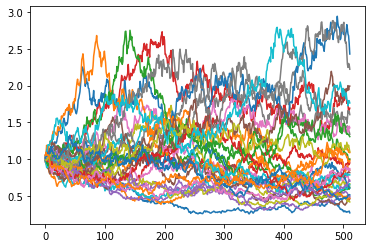

In [5]:
LINES_TO_PLOT = 32

fig = plt.figure()
ax = plt.axes()
x = np.arange(STEPS)
for i in np.random.choice(PATHS, size=LINES_TO_PLOT):
    ax.plot(x, prices[:, i])